# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [4]:
! git clone https://github.com/DS3001/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./linearRegression/data/Q1_clean.csv")
df.columns = df.columns.str.strip() # Remove trailing and leading whitespace
# df.shape

In [7]:
price_by_neighborhood = df.groupby('Neighbourhood')['Price'].mean()
price_by_neighborhood
# Manhattan is the most expensive borough on average, followed by Staten Island

Neighbourhood
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

In [8]:
scores_by_neighborhood = df.groupby('Review Scores Rating')['Price'].mean()
scores_by_neighborhood

Review Scores Rating
20.0      93.358974
30.0      52.500000
40.0     217.659574
43.0      85.500000
47.0      79.333333
49.0     169.000000
50.0     133.526316
53.0      92.000000
55.0     193.333333
57.0     200.000000
58.0     122.500000
60.0     117.495902
62.0     125.000000
63.0     134.800000
64.0     115.750000
65.0     154.142857
66.0     193.333333
67.0     136.452381
68.0     171.000000
69.0     118.272727
70.0     145.242424
71.0     129.863636
72.0     125.000000
73.0     129.595506
74.0     162.461538
75.0     125.466667
76.0     188.400000
77.0     122.987500
78.0     134.238095
79.0     121.891304
80.0     136.735770
81.0     140.484848
82.0     138.411765
83.0     142.138577
84.0     150.757785
85.0     137.561644
86.0     141.169540
87.0     149.236695
88.0     153.431596
89.0     142.505357
90.0     146.110468
91.0     148.125616
92.0     153.625143
93.0     149.114622
94.0     152.006363
95.0     165.102703
96.0     164.813973
97.0     166.631171
98.0     177.937055

Text(0.5, 1.0, 'Price Grouped by Neighbourhood')

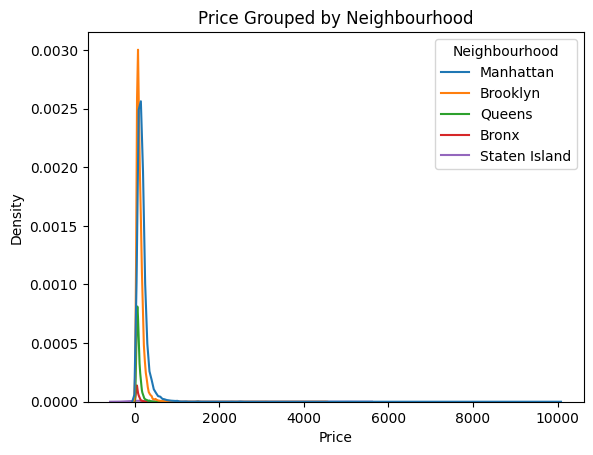

In [9]:
sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title('Price Grouped by Neighbourhood')
# Brooklyn appears most expensive

Text(0.5, 1.0, 'Log Price Grouped by Neighbourhood')

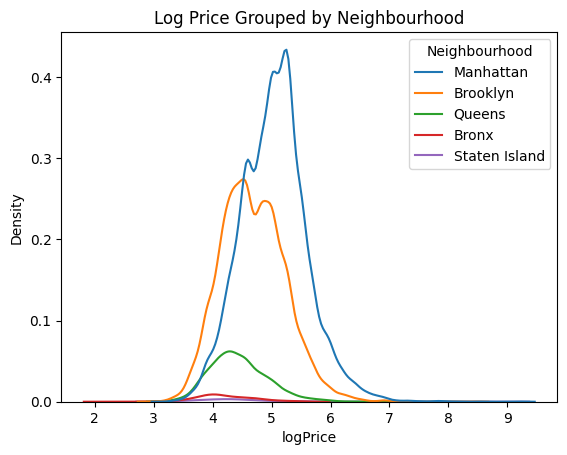

In [10]:
df['logPrice'] = np.log(df['Price'])
sns.kdeplot(data=df, x='logPrice', hue='Neighbourhood')
plt.title('Log Price Grouped by Neighbourhood')
# Manhattan appears to be the most expensive, followed by Brooklyn

In [11]:
df.drop('logPrice', axis=1, inplace=True)
# df.head()

2. Regress price on `Neighbourhood` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [12]:
dummies = pd.get_dummies(df[['Neighbourhood', 'Property Type', 'Room Type']], dtype='int') # Create df with dummy variables
# df_num = df[['Price', 'Review Scores Rating']]
df = pd.concat([dummies, df], axis=1)

In [13]:
df.drop(['Neighbourhood', 'Property Type', 'Room Type'], axis=1, inplace=True) # Drop variables that are now dummy variables
df.shape # Sanity check
df.head()

,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Bungalow,Property Type_Cabin,...,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Price,Review Scores Rating
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,549,96.0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,149,100.0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,250,100.0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,90,94.0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,270,90.0


In [14]:
from sklearn.linear_model import LinearRegression
import re

X = df.filter(regex='Neighbourhood', axis=1) # all variables containing 'Neighbourhood'
y = df['Price']

reg = LinearRegression(fit_intercept=False).fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

print('R-squared:', reg.score(X, y))
print(results)

R-squared: 0.04631389606035197
                      variable  coefficient
0          Neighbourhood_Bronx    75.276498
1       Neighbourhood_Brooklyn   127.747378
2      Neighbourhood_Manhattan   183.664286
3         Neighbourhood_Queens    96.857233
4  Neighbourhood_Staten Island   146.166667


Regressing neighbourhood on price allows us to see the effect that each neighborhood (predictor variable) will have on price (target variable). For example, Bronx has a coefficent of 75.28, meaning that on average, prices in Bronx are 75.28 dollars more expensive than the baseline, or average price of neighbourhoods across the five boroughs of New York City. The coefficients from the regression model for each neighborhood are the same as the average price grouped by neighbourhood in Q1. The kernel density plot shows slightly different trends than the regression coefficients because Brooklyn appears to the second most expensive neighbourhood, not Brooklyn. The coefficients in a regression of a continuous variable on one categorical variable is the average numeric value for the target variable (price) grouped by the predictor variable (neighborhood).

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

The intercept in the regression model when regressing a continuous variable (price) on a categorical variable (neighbourhood) is the value of price when all dummy variables contain all zeroes. To get back the coefficients from part 2, you can add back the first value of each dummy variable.

In [15]:
# Reload data
df = pd.read_csv("./linearRegression/data/Q1_clean.csv")
df.columns = df.columns.str.strip() # Remove trailing and leading whitespace

In [16]:
# Running the model without 'fit_intercept=False'
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first=True)
y = df['Price']

reg = LinearRegression().fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

print('R-squared:', reg.score(X, y))
print('Intercept', reg.intercept_)
print(results)

# Notice that Bronx was dropped

R-squared: 0.04631389606035197
Intercept 75.27649769585331
        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


In [17]:
# Adding back Bronx
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_+reg.intercept_})
results # Same as before

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


The R-squared value is almost the same, with the value for this regression being 0.003 smaller than in part 2. The values of the coefficients are their respective values minus 75.28, the coefficient of Bronx (which was dropped).

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [18]:
df = pd.read_csv('./linearRegression/data/Q1_clean.csv') # Reload data
df.columns = df.columns.str.strip()

X = df[['Review Scores Rating', 'Neighbourhood']]
y = df['Price']

In [19]:
neighbourhood_dummies = pd.get_dummies(X['Neighbourhood'], dtype='int') # Create dummy variables
X = pd.concat([neighbourhood_dummies, X], axis=1)

In [20]:
X.drop('Neighbourhood', axis=1, inplace=True)
# X.head()

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=100)

# Fit the model and make predictions
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test) # Predict values

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
print(results)

R-squared: 0.06701086106947296
RMSE: 125.01092061382933
               variable  coefficient
0                 Bronx   -17.261392
1              Brooklyn    32.180888
2             Manhattan    89.421020
3                Queens     4.050208
4         Staten Island    61.576393
5  Review Scores Rating     1.032257


The R-squared and the RMSE on the test set are 0.067 and 125.01. The coefficient of Review Scores Rating is 1.03, which is relatively small in magnitude compared to the coefficients of the neighbourhoods. The model indicates that rating is less influential on price than neighbourhood. The most expensive neighbourhood to live in is Manhattan, with a coefficient of 89.42.

In [22]:
print("Living in Manhattan would cost $", round(89.42+100*1.03, 2), "compared to average housing prices in NYC.")

Living in Manhattan would cost $ 192.42 compared to average housing prices in NYC.


5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [23]:
df = pd.read_csv('./linearRegression/data/Q1_clean.csv') # Reload data
df.columns = df.columns.str.strip()

In [24]:
X = df[['Neighbourhood', 'Room Type', 'Review Scores Rating']]
y = df['Price']

X_dummies = pd.get_dummies(X[['Room Type', 'Neighbourhood']], dtype='int') # Get dummies
X = pd.concat([X_dummies, X], axis=1) # Combine original X with dummy X
X.head()

,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Neighbourhood,Room Type,Review Scores Rating
0,0,1,0,0,0,1,0,0,Manhattan,Private room,96.0
1,1,0,0,0,1,0,0,0,Brooklyn,Entire home/apt,100.0
2,1,0,0,0,0,1,0,0,Manhattan,Entire home/apt,100.0
3,0,1,0,0,1,0,0,0,Brooklyn,Private room,94.0
4,1,0,0,0,0,1,0,0,Manhattan,Entire home/apt,90.0


In [25]:
X.drop(['Room Type', 'Neighbourhood'], axis=1, inplace=True) # Drop vars that were converted to dummy vars
# X.head()

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=100)

# Fit the model and make predictions
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test) # Predict values

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
results

R-squared: 0.2203534812928235
RMSE: 114.27692123130632


,variable,coefficient
0,Room Type_Entire home/apt,110.617820
1,Room Type_Private room,3.101341
2,Room Type_Shared room,-19.500474
3,Neighbourhood_Bronx,-13.022765
4,Neighbourhood_Brooklyn,10.378456
5,Neighbourhood_Manhattan,53.693304
6,Neighbourhood_Queens,-6.833330
7,Neighbourhood_Staten Island,50.003022
8,Review Scores Rating,0.626912


The coefficient on Review Scores Rating is 0.63. The R-squared and RMSE values on the test set are 0.22 and 114.28. The most expensive type of property you could rent is an entire home or apartment in Manhattan with a 100% rating.

In [27]:
expensive_prop = round((110.617820 + 53.693304 + 100 * 0.626912), 2)
print("An entire home or apartment in Manhattan with a 100% rating woulc cost $", expensive_prop,)

An entire home or apartment in Manhattan with a 100% rating woulc cost $ 227.0


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

If 'Review Scores Rating' were to change, the influence it would have on the model predicting the target variable (price) would change. If it were to increase, rating would be more powerful in predicting price, and vice versa. It could also mean one or more variables were added or removed, causing rating to have different weight when predicting price.

7. We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [28]:
# Reload df and define X and y
df = pd.read_csv('./linearRegression/data/Q1_clean.csv')
df.columns = df.columns.str.strip()

X = df[['Neighbourhood', 'Property Type', 'Review Scores Rating']]
y = df['Price']

In [29]:
# Create interactions
from sklearn.preprocessing import OneHotEncoder
X2 = X.copy()
# X_d = X[['Property Type', 'Neighbourhood']] # Subset interaction/dummy vars
X2['Interaction'] = X['Property Type'] + ' in ' + X['Neighbourhood'] # Create interaction terms

encoder = OneHotEncoder()
interaction_dummies = encoder.fit_transform(X2[['Interaction']]) # Get dummies for interactions

interaction_df = pd.DataFrame(interaction_dummies.toarray(), columns=encoder.get_feature_names_out(['Interaction'])) # Combine interaction vars into a dataframe
interaction_df.head()
#X2.head()

,Interaction_Apartment in Bronx,Interaction_Apartment in Brooklyn,Interaction_Apartment in Manhattan,Interaction_Apartment in Queens,Interaction_Apartment in Staten Island,Interaction_Bed & Breakfast in Bronx,Interaction_Bed & Breakfast in Brooklyn,Interaction_Bed & Breakfast in Manhattan,Interaction_Bed & Breakfast in Queens,Interaction_Bed & Breakfast in Staten Island,...,Interaction_Other in Staten Island,Interaction_Townhouse in Bronx,Interaction_Townhouse in Brooklyn,Interaction_Townhouse in Manhattan,Interaction_Townhouse in Queens,Interaction_Townhouse in Staten Island,Interaction_Treehouse in Brooklyn,Interaction_Treehouse in Manhattan,Interaction_Villa in Manhattan,Interaction_Villa in Queens
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Combine interaction_df with X, drop Property Type, Interaction, and Neighbourhood
X = pd.concat([X, interaction_df], axis=1)

In [31]:
X.drop(['Property Type', 'Neighbourhood'], axis=1, inplace=True)

In [32]:
X.head() # Looks good
print(X.columns)

Index(['Review Scores Rating', 'Interaction_Apartment in Bronx',
       'Interaction_Apartment in Brooklyn',
       'Interaction_Apartment in Manhattan', 'Interaction_Apartment in Queens',
       'Interaction_Apartment in Staten Island',
       'Interaction_Bed & Breakfast in Bronx',
       'Interaction_Bed & Breakfast in Brooklyn',
       'Interaction_Bed & Breakfast in Manhattan',
       'Interaction_Bed & Breakfast in Queens',
       'Interaction_Bed & Breakfast in Staten Island',
       'Interaction_Boat in Brooklyn', 'Interaction_Boat in Queens',
       'Interaction_Bungalow in Queens', 'Interaction_Cabin in Manhattan',
       'Interaction_Cabin in Queens', 'Interaction_Camper/RV in Brooklyn',
       'Interaction_Camper/RV in Queens', 'Interaction_Castle in Manhattan',
       'Interaction_Chalet in Brooklyn', 'Interaction_Condominium in Bronx',
       'Interaction_Condominium in Brooklyn',
       'Interaction_Condominium in Manhattan',
       'Interaction_Condominium in Queens', '

In [33]:
# Train-Test split
from sklearn.model_selection import train_test_split # Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=3402)

In [38]:
# Fit the model and make predictions
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test)

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
print(results.nlargest(1, 'coefficient')) # .max() not working correctly
print(results)


R-squared: 0.048616767280347695
RMSE: 185.35738389924734
                         variable  coefficient
36  Interaction_Loft in Manhattan   232.629773
                                        variable   coefficient
0                           Review Scores Rating  1.013044e+00
1                 Interaction_Apartment in Bronx -1.583143e+01
2              Interaction_Apartment in Brooklyn  3.037160e+01
3             Interaction_Apartment in Manhattan  8.554811e+01
4                Interaction_Apartment in Queens  5.832467e+00
5         Interaction_Apartment in Staten Island  3.561004e+00
6           Interaction_Bed & Breakfast in Bronx -2.123916e+01
7        Interaction_Bed & Breakfast in Brooklyn -7.853782e+00
8       Interaction_Bed & Breakfast in Manhattan  4.215302e+01
9          Interaction_Bed & Breakfast in Queens -1.442818e+01
10  Interaction_Bed & Breakfast in Staten Island  3.276084e+01
11                  Interaction_Boat in Brooklyn  3.760842e+00
12                    Interact

Compared to the model that regressed Price on Property Type, Neighbourhood, and Review Scores Rating, R-squared decreased from 0.22 to 0.049, and RMSE increased from 114.28 to 185.36. The coefficient of Review Scores Rating increased from 0.63 to 1.01, meaning that rating has higher predictive power over rent price in this model. A lower R-squared and a higher RMSE in this model compared to the model from 6) indicates that this model does not predict price as well.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv('./linearRegression/data/cars_hw.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [44]:
for column in df.columns:
  missings = round((df[column].isna().sum() * 100), 2)
  print(f"{column}: {missings}% missing") # No missings

Make: 0% missing
Make_Year: 0% missing
Color: 0% missing
Body_Type: 0% missing
Mileage_Run: 0% missing
No_of_Owners: 0% missing
Seating_Capacity: 0% missing
Fuel_Type: 0% missing
Transmission: 0% missing
Transmission_Type: 0% missing
Price: 0% missing


In [ ]:
# Check distributions of variables

In [45]:
df.dtypes

Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

In [48]:
import seaborn as sns

def make_kdeplot(column):
  sns.kdeplot(column)

<Axes: xlabel='Mileage_Run', ylabel='Density'>

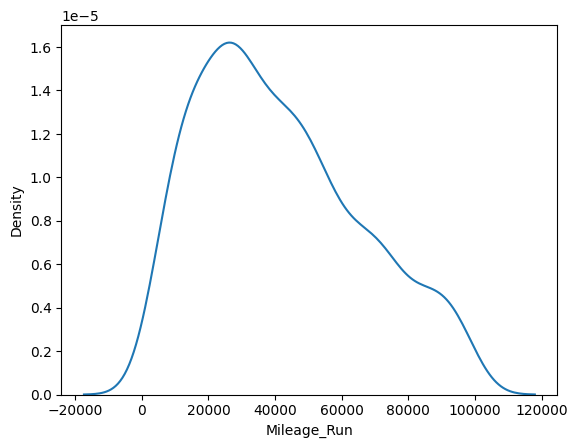

In [49]:
make_kdeplot(df['Mileage_Run'])

<Axes: xlabel='Seating_Capacity', ylabel='Density'>

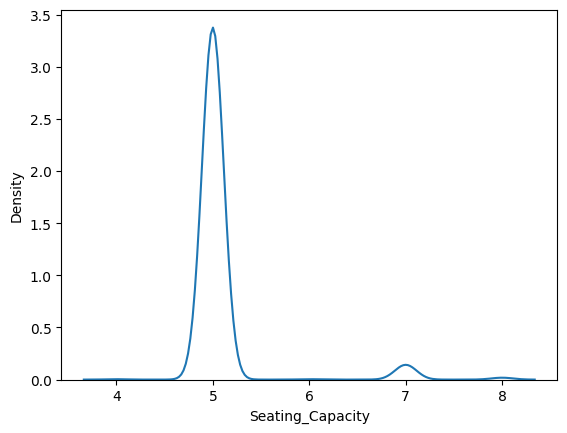

In [50]:
make_kdeplot(df['Seating_Capacity'])

<Axes: xlabel='Price', ylabel='Density'>

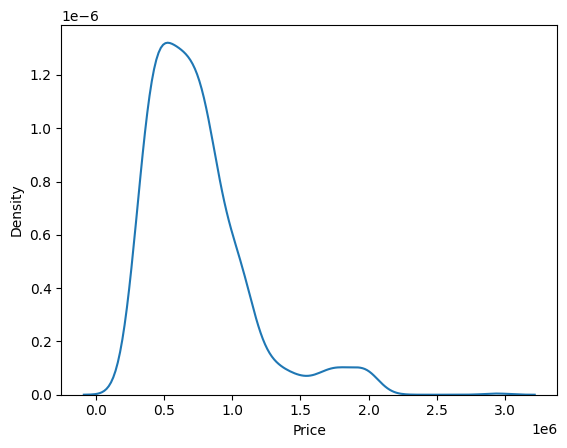

In [51]:
make_kdeplot(df['Price'])

In [65]:
# Tranforming Mileage_Run and Price
df['Price'] = np.arcsinh(df['Price'])
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])

<Axes: xlabel='Price_T', ylabel='Density'>

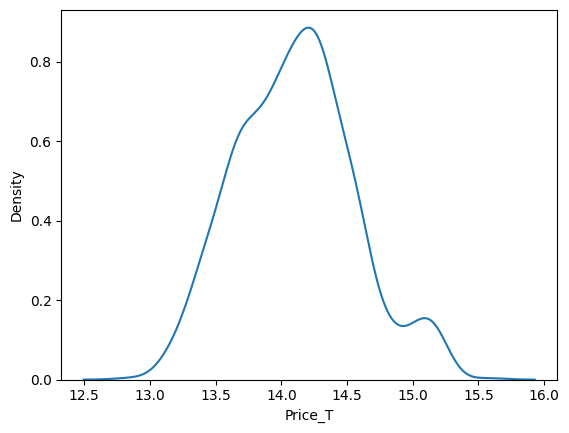

In [53]:
make_kdeplot(df['Price'])

<Axes: xlabel='Mileage_Run_T', ylabel='Density'>

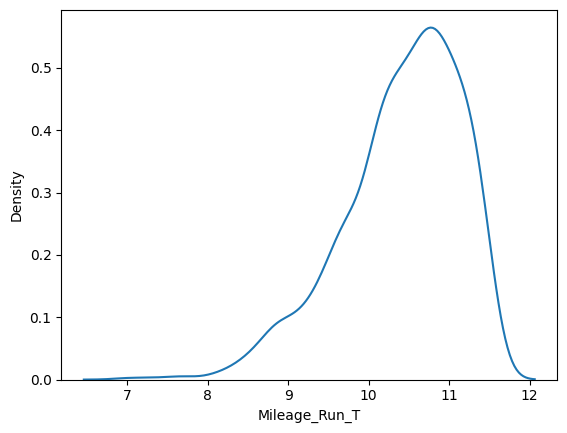

In [56]:
make_kdeplot(df['Mileage_Run']) # Looked better before the transformation, but transformation makes units consistent with price

In [66]:
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,11.398883,1st,5,diesel,7-Speed,Automatic,14.088586
1,Hyundai,2016,red,crossover,10.611770,1st,5,petrol,5-Speed,Manual,14.125932
2,Honda,2019,white,suv,10.986648,2nd,5,petrol,5-Speed,Manual,14.276726
3,Renault,2017,bronze,hatchback,11.175493,1st,5,petrol,5-Speed,Manual,13.626768
4,Hyundai,2017,orange,hatchback,10.824806,1st,5,petrol,5-Speed,Manual,13.845069


<Axes: ylabel='Mileage_Run'>

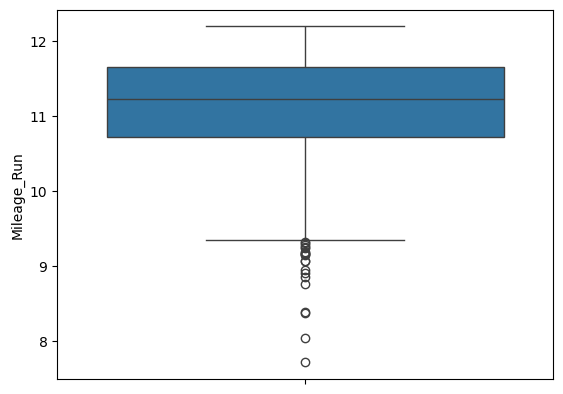

In [67]:
# Check for outliers
sns.boxplot(df['Mileage_Run'])

<Axes: ylabel='Price'>

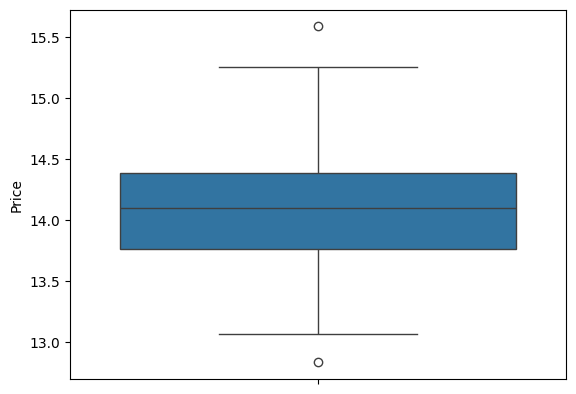

In [68]:
sns.boxplot(df['Price'])

In [70]:
# Winsorize Mileage_Run and Price
def winsorize(x):
   # Convert from pd to np, if necessary:
   if type(x) == 'pandas.core.series.Series':
       x = x.to_numpy()
   # Compute IQR and 25, 75 quantiles:
   pct25, pct75 = np.percentile(x,[25,75])
   iqr = pct75 - pct25
   # Compute whiskers:
   lower_whisker = pct25 - iqr*1.5
   upper_whisker = pct75 + iqr*1.5
   # Windorize x:
   x_winsor = np.copy(x)
   x_winsor[ x < lower_whisker ] = lower_whisker
   x_winsor[ x > upper_whisker ] = upper_whisker
   return(x_winsor)

<Axes: >

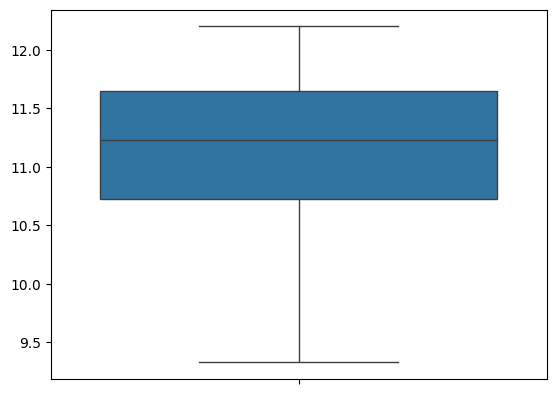

In [71]:
sns.boxplot(winsorize(df['Mileage_Run']))

<Axes: >

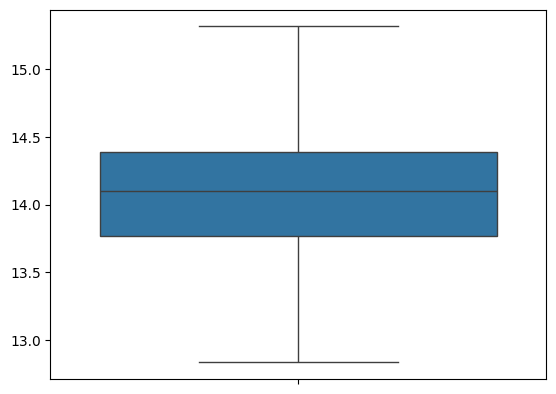

In [72]:
sns.boxplot(winsorize(df['Price']))

In [73]:
# Replace Mileage_Run and Price with winsorized variables
df['Mileage_Run'] = winsorize(df['Mileage_Run'])
df['Price'] = winsorize(df['Price'])

In [74]:
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,11.398883,1st,5,diesel,7-Speed,Automatic,14.088586
1,Hyundai,2016,red,crossover,10.611770,1st,5,petrol,5-Speed,Manual,14.125932
2,Honda,2019,white,suv,10.986648,2nd,5,petrol,5-Speed,Manual,14.276726
3,Renault,2017,bronze,hatchback,11.175493,1st,5,petrol,5-Speed,Manual,13.626768
4,Hyundai,2017,orange,hatchback,10.824806,1st,5,petrol,5-Speed,Manual,13.845069


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [75]:
df['Price'].describe()

count    976.000000
mean      14.103899
std        0.449429
min       12.838145
25%       13.765795
50%       14.102942
75%       14.384228
max       15.311877
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

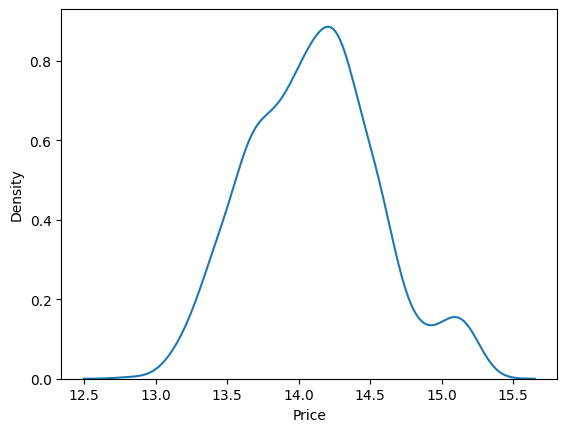

In [76]:
sns.kdeplot(df['Price'])

In [77]:
df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


<Axes: xlabel='Price', ylabel='Density'>

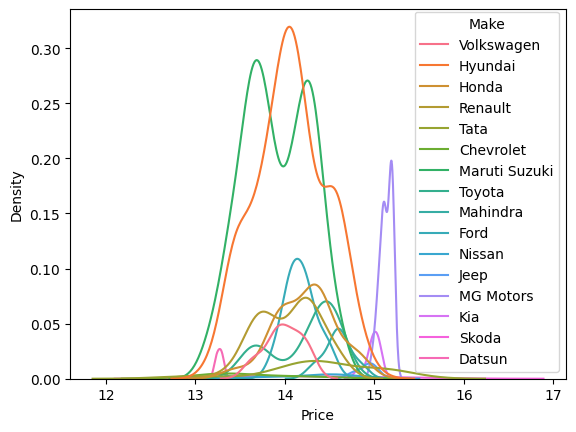

In [78]:
sns.kdeplot(data=df, x='Price', hue='Make')

MG Motors, Jeep, and Kia appear to be the most expensive car brands. In general, the distributions of car prices for each brand appear to be multimodal or bimodal, indicating that there are several different classes of prices for each car brand. For example, the brand Maruti Suzuki shows a clear bimodal peak in the kernel density plot, indicating that they offer at least two models of cars that are priced differently.

3. Split the data into an 80% training set and a 20% testing set.

In [82]:
X = df.iloc[:, :-1]
y = df['Price']

from sklearn.model_selection import train_test_split # Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=3402)

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [86]:
df.columns

Index(['Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

In [91]:
numeric_vars = df[['Mileage_Run', 'Seating_Capacity', 'Make_Year']]
cat_vars = df[['Make', 'Color', 'Body_Type',
       'No_of_Owners', 'Fuel_Type', 'Transmission',
       'Transmission_Type']]

In [97]:
cat_vars.dtypes

Make                 object
Color                object
Body_Type            object
No_of_Owners         object
Fuel_Type            object
Transmission         object
Transmission_Type    object
dtype: object

In [108]:
# Model with Numeric Variables
X = df[['Mileage_Run', 'Seating_Capacity', 'Make_Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=3402)

from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test)

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
print(results)

R-squared: 0.09341060261618905
RMSE: 0.44338123303563715
           variable  coefficient
0       Mileage_Run    -0.110510
1  Seating_Capacity     0.082755
2         Make_Year     0.007391


In [103]:
# Create dummy variables
from sklearn.preprocessing import OneHotEncoder

cat_vars = df[['Make', 'Color', 'Body_Type',
       'No_of_Owners', 'Fuel_Type', 'Transmission',
       'Transmission_Type']]

encoder = OneHotEncoder(drop='first')
encoded_vars = encoder.fit_transform(cat_vars) # Get dummies for interactions

X_cat = pd.DataFrame(encoded_vars.toarray(), columns=encoder.get_feature_names_out(cat_vars.columns))
X_cat.head()

,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,Make_Nissan,...,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [104]:
# Model with categorical variables
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=.2,random_state=3402)

from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test)

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
print(results)

R-squared: -1.7277571676721877
RMSE: 0.7690858867142156
                    variable  coefficient
0                Make_Datsun     5.653394
1                  Make_Ford     6.476754
2                 Make_Honda     6.165186
3               Make_Hyundai     6.459414
4                  Make_Jeep     6.691113
5                   Make_Kia     6.723168
6             Make_MG Motors     6.968936
7              Make_Mahindra     6.495892
8         Make_Maruti Suzuki     6.230615
9                Make_Nissan     6.465508
10              Make_Renault     6.190483
11                Make_Skoda     6.993100
12                 Make_Tata     6.864211
13               Make_Toyota     6.207450
14           Make_Volkswagen     6.086372
15               Color_black     4.491482
16                Color_blue     4.695874
17              Color_bronze     4.440061
18               Color_brown     4.744920
19              Color_golden     4.964265
20               Color_green    10.442750
21                Co

In [109]:
# Concatenate dummy and numeric variables
X = pd.concat([X_cat, X], axis=1)
X.head()

,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,Make_Nissan,...,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual,Mileage_Run,Seating_Capacity,Make_Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.398883,5,2017
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.611770,5,2016
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.986648,5,2019
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.175493,5,2017
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.824806,5,2017


In [110]:
# Model with all variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=3402)

from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

y_hat = reg.predict(X_test)

e = y_test - y_hat
rmse = np.sqrt(np.mean(e**2))
print('R-squared:', reg.score(X_test, y_test))
print('RMSE:', rmse)
print(results)


R-squared: 0.7513109507296366
RMSE: 0.2322203739147431
                    variable  coefficient
0                Make_Datsun     0.052196
1                  Make_Ford     0.396130
2                 Make_Honda     0.568239
3               Make_Hyundai     0.513525
4                  Make_Jeep     0.687884
5                   Make_Kia     0.876667
6             Make_MG Motors     1.001085
7              Make_Mahindra     0.410123
8         Make_Maruti Suzuki     0.427448
9                Make_Nissan     0.403446
10              Make_Renault     0.329675
11                Make_Skoda     0.441963
12                 Make_Tata     0.495082
13               Make_Toyota     0.608011
14           Make_Volkswagen     0.457959
15               Color_black     0.123867
16                Color_blue     0.249902
17              Color_bronze     0.088149
18               Color_brown     0.185772
19              Color_golden     0.203927
20               Color_green     0.315014
21                Col

ADD EXPLANATION

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?
7. Show that if you regress a variable $y$ on a one-hot encoded variable and no intercept, the regression coefficients are the group averages.

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?